# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [5]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 9.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 40.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 10.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 25.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 5.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 1.5 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.6 MB/s eta 0:00:00:00:0100:01
   ━━

In [26]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import os
import boto3
import sagemaker
from sagemaker import get_execution_role
from sagemaker.tuner import CategoricalParameter, ContinuousParameter, HyperparameterTuner
from sagemaker.pytorch import PyTorch
from sagemaker.debugger import Rule, DebuggerHookConfig, TensorBoardOutputConfig, CollectionConfig, ProfilerRule, rule_configs, ProfilerConfig, FrameworkProfile
from sagemaker.analytics import HyperparameterTuningJobAnalytics
from sagemaker.pytorch import PyTorchModel
from sagemaker.predictor import Predictor

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [27]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
#!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
#!unzip dogImages.zip

In [28]:
BUCKET = 'sagemaker-us-east-1-807919758773'

os.environ['SM_CHANNEL_TRAINING']=f's3://{BUCKET}/'
os.environ['SM_MODEL_DIR']=f's3://{BUCKET}/model/'
os.environ['SM_OUTPUT_DATA_DIR']=f's3://{BUCKET}/output/'

data_channels = {
    "train": "s3://{}/train/".format(BUCKET),
    "test": "s3://{}/test/".format(BUCKET),
    "valid": "s3://{}/valid/".format(BUCKET)
}

role = sagemaker.get_execution_role()


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [31]:
print (data_channels)
print(os.environ['SM_CHANNEL_TRAINING'])
print(os.environ['SM_MODEL_DIR'])
print(os.environ['SM_OUTPUT_DATA_DIR'])


{'train': 's3://sagemaker-us-east-1-807919758773/train/', 'test': 's3://sagemaker-us-east-1-807919758773/test/', 'valid': 's3://sagemaker-us-east-1-807919758773/valid/'}
s3://sagemaker-us-east-1-807919758773/
s3://sagemaker-us-east-1-807919758773/model/
s3://sagemaker-us-east-1-807919758773/output/


## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [32]:
#TODO: Declare your HP ranges, metrics etc.
hyperparameter_ranges = {
    "learning-rate": ContinuousParameter(0.001, 0.1),
    "batch-size": CategoricalParameter([16, 32, 64, 128, 256, 512]),
    "early-stopping-rounds": CategoricalParameter([10, 12, 15, 17, 20])
}

objective_metric_name = "Test Loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "Test Loss", "Regex": "Testing Loss: (\d+\.\d+)"}]

In [33]:
#TODO: Create estimators for your HPs

estimator = PyTorch(
    entry_point="hpo.py",
    base_job_name="HP",
    role=role,
    framework_version="1.8.0",
    instance_count=1,
    instance_type="ml.g4dn.xlarge",
    py_version="py3",
)

tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=10,
    max_parallel_jobs=2,
    objective_type=objective_type,
)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [35]:
# TODO: Fit your HP Tuner
tuner.fit({"training": f"s3://{BUCKET}/"}) # TODO: Remember to include your data channels

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


Using provided s3_resource
...............................................................................................................................................................................................!


In [36]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()
print(best_estimator.hyperparameters())

#Get the hyperparameters of the best trained model

hyperparameters = {"batch-size": int(best_estimator.hyperparameters()['batch-size'].replace('"', '')), \
                   "learning-rate": best_estimator.hyperparameters()['learning-rate'],
                   "early-stopping-rounds": int(best_estimator.hyperparameters()['early-stopping-rounds'].replace('"', ''))
                  }
hyperparameters


2024-01-28 19:09:07 Starting - Found matching resource for reuse
2024-01-28 19:09:07 Downloading - Downloading the training image
2024-01-28 19:09:07 Training - Training image download completed. Training in progress.
2024-01-28 19:09:07 Uploading - Uploading generated training model
2024-01-28 19:09:07 Completed - Resource retained for reuse
{'_tuning_objective_metric': '"Test Loss"', 'batch-size': '"16"', 'early-stopping-rounds': '"15"', 'learning-rate': '0.0010000000000000002', 'sagemaker_container_log_level': '20', 'sagemaker_estimator_class_name': '"PyTorch"', 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"', 'sagemaker_job_name': '"HP-2024-01-28-18-53-04-722"', 'sagemaker_program': '"hpo.py"', 'sagemaker_region': '"us-east-1"', 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-807919758773/HP-2024-01-28-18-53-04-722/source/sourcedir.tar.gz"'}


{'batch-size': 16,
 'learning-rate': '0.0010000000000000002',
 'early-stopping-rounds': 15}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [37]:
# TODO: Set up debugging and profiling rules and hooks
rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]

hook_config = DebuggerHookConfig(
    hook_parameters={
        "train.save_interval": "100",
        "eval.save_interval": "10"
    }
)

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=1)
)

Framework profiling will be deprecated from tensorflow 2.12 and pytorch 2.0 in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [38]:
# TODO: Create and fit an estimator

estimator = PyTorch(
    entry_point="train_model.py",
    base_job_name="MAIN",
    role=role,
    instance_count=2,
    instance_type="ml.g4dn.xlarge",
    framework_version="1.8.0",
    py_version="py3",
    hyperparameters=hyperparameters,
    rules=rules,
    debugger_hook_config=hook_config,
    profiler_config=profiler_config,
)
estimator.fit({"training": f"s3://{BUCKET}/"})
# TODO: Your estimator here

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
Using provided s3_resource


INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: MAIN-2024-01-28-19-10-34-354


2024-01-28 19:10:35 Starting - Starting the training job...
2024-01-28 19:11:05 Starting - Preparing the instances for trainingVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
ProfilerReport: InProgress
.........
2024-01-28 19:12:30 Downloading - Downloading input data...
2024-01-28 19:13:05 Downloading - Downloading the training image.....................
2024-01-28 19:16:31 Training - Training image download completed. Training in progress.bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2024-01-28 19:16:21,329 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2024-01-28 19:16:21,366 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2024-01-28 19:16:21,369 sagemaker_pytorch_container.training INFO     Invoking user training script.
2024-01-28 19:16:21,667 sagemaker-training-toolkit

In [39]:
# TODO: Plot a debugging output.
job_name = estimator.latest_training_job.name
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=estimator.latest_training_job.name)
description

{'TrainingJobName': 'MAIN-2024-01-28-19-10-34-354',
 'TrainingJobArn': 'arn:aws:sagemaker:us-east-1:807919758773:training-job/MAIN-2024-01-28-19-10-34-354',
 'ModelArtifacts': {'S3ModelArtifacts': 's3://sagemaker-us-east-1-807919758773/MAIN-2024-01-28-19-10-34-354/output/model.tar.gz'},
 'TrainingJobStatus': 'Completed',
 'SecondaryStatus': 'Completed',
 'HyperParameters': {'batch-size': '16',
  'early-stopping-rounds': '15',
  'learning-rate': '"0.0010000000000000002"',
  'sagemaker_container_log_level': '20',
  'sagemaker_job_name': '"MAIN-2024-01-28-19-10-34-354"',
  'sagemaker_program': '"train_model.py"',
  'sagemaker_region': '"us-east-1"',
  'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-807919758773/MAIN-2024-01-28-19-10-34-354/source/sourcedir.tar.gz"'},
 'AlgorithmSpecification': {'TrainingImage': '763104351884.dkr.ecr.us-east-1.amazonaws.com/pytorch-training:1.8.0-gpu-py3',
  'TrainingInputMode': 'File',
  'EnableSageMakerMetricsTimeSeries': True},
 'RoleArn': 'arn

In [40]:
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

trial = create_trial(estimator.latest_job_debugger_artifacts_path())

[2024-01-28 19:52:28.128 sagemaker-data-scienc-ml-t3-medium-ccb588b5efaf671be41927273f0c:17 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2024-01-28 19:52:28.163 sagemaker-data-scienc-ml-t3-medium-ccb588b5efaf671be41927273f0c:17 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-807919758773/MAIN-2024-01-28-19-10-34-354/debug-output
[2024-01-28 19:52:28.508 sagemaker-data-scienc-ml-t3-medium-ccb588b5efaf671be41927273f0c:17 WARNING s3handler.py:184] Encountered the exception An error occurred while reading from response stream: ('Connection broken: IncompleteRead(0 bytes read, 235 more expected)', IncompleteRead(0 bytes read, 235 more expected)) while reading s3://sagemaker-us-east-1-807919758773/MAIN-2024-01-28-19-10-34-354/debug-output/index/000000000/000000000700_worker_0.json . Will retry now


In [41]:
def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    print(f"[INFO] Getting data in {len(steps)} steps")
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
        print(".", end="")
    return steps, vals

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot


def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(20, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("completed TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()

INFO:matplotlib.font_manager:generated new fontManager


[2024-01-28 19:53:00.584 sagemaker-data-scienc-ml-t3-medium-ccb588b5efaf671be41927273f0c:17 INFO trial.py:197] Training has ended, will refresh one final time in 1 sec.
[2024-01-28 19:53:01.604 sagemaker-data-scienc-ml-t3-medium-ccb588b5efaf671be41927273f0c:17 INFO trial.py:210] Loaded all steps
[INFO] Getting data in 95 steps
...............................................................................................loaded TRAIN data
[INFO] Getting data in 6 steps
......loaded EVAL data
completed TRAIN plot
completed EVAL plot


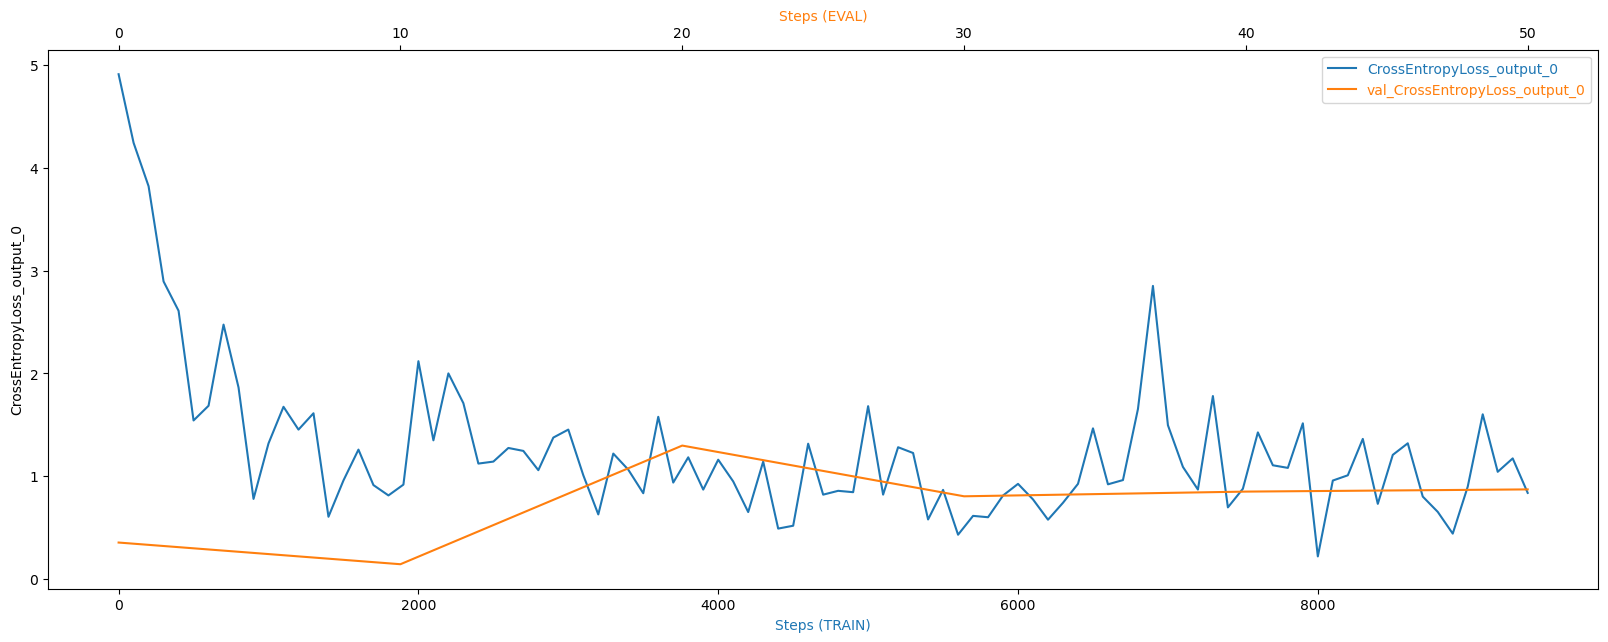

In [43]:
plot_tensor(trial, "CrossEntropyLoss_output_0")

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [44]:
# TODO: Display the profiler output
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"

In [45]:
! aws s3 ls {rule_output_path} --recursive

2024-01-28 19:50:33     501723 MAIN-2024-01-28-19-10-34-354/rule-output/ProfilerReport/profiler-output/profiler-report.html
2024-01-28 19:50:32     371481 MAIN-2024-01-28-19-10-34-354/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2024-01-28 19:50:26        889 MAIN-2024-01-28-19-10-34-354/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2024-01-28 19:50:26      27453 MAIN-2024-01-28-19-10-34-354/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2024-01-28 19:50:26       2098 MAIN-2024-01-28-19-10-34-354/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2024-01-28 19:50:26        488 MAIN-2024-01-28-19-10-34-354/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2024-01-28 19:50:26       2578 MAIN-2024-01-28-19-10-34-354/rule-output/ProfilerReport/profiler-output/profiler-reports/IOBottleneck.json
2024-01-28 19:50:26        544 MAIN-2024-01-28-19-10-34-354/

In [46]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-807919758773/MAIN-2024-01-28-19-10-34-354/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json to ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
download: s3://sagemaker-us-east-1-807919758773/MAIN-2024-01-28-19-10-34-354/rule-output/ProfilerReport/profiler-output/profiler-reports/LoadBalancing.json to ProfilerReport/profiler-output/profiler-reports/LoadBalancing.json
download: s3://sagemaker-us-east-1-807919758773/MAIN-2024-01-28-19-10-34-354/rule-output/ProfilerReport/profiler-output/profiler-reports/IOBottleneck.json to ProfilerReport/profiler-output/profiler-reports/IOBottleneck.json
download: s3://sagemaker-us-east-1-807919758773/MAIN-2024-01-28-19-10-34-354/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json to ProfilerReport/profiler-output/profiler-reports/Dataloader.json
download: s3://sagemaker-us-east-1-807919758773/MAIN-2024-01-28-19-10-34-354/rule-output/ProfilerReport/

In [47]:
import os

# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

In [48]:
import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

## Model Deploying

In [64]:
jpeg_serializer = sagemaker.serializers.IdentitySerializer("image/jpeg")
json_deserializer = sagemaker.deserializers.JSONDeserializer()


class ImagePredictor(Predictor):
    def __init__(self, endpoint_name, sagemaker_session):
        super(ImagePredictor, self).__init__(
            endpoint_name,
            sagemaker_session=sagemaker_session,
            serializer=jpeg_serializer,
            deserializer=json_deserializer,
        )

In [65]:
pytorch_model = PyTorchModel(model_data=estimator.model_data, role=role, entry_point='inference.py',py_version='py3',
                             framework_version='1.8',
                             predictor_cls=ImagePredictor)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [66]:
# TODO: Deploy your model to an endpoint

predictor = pytorch_model.deploy(initial_instance_count=1, instance_type='ml.m5.large') # TODO: Add your deployment configuration like instance type and number of instances

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


INFO:sagemaker:Repacking model artifact (s3://sagemaker-us-east-1-807919758773/MAIN-2024-01-28-19-10-34-354/output/model.tar.gz), script artifact (None), and dependencies ([]) into single tar.gz file located at s3://sagemaker-us-east-1-807919758773/pytorch-inference-2024-01-28-20-17-21-847/model.tar.gz. This may take some time depending on model size...
INFO:sagemaker:Creating model with name: pytorch-inference-2024-01-28-20-17-30-617
INFO:sagemaker:Creating endpoint-config with name pytorch-inference-2024-01-28-20-17-31-326
INFO:sagemaker:Creating endpoint with name pytorch-inference-2024-01-28-20-17-31-326


------!

In [58]:
# TODO: Run an prediction on the endpoint
import requests
request_dict={ "url": "https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/20113314/Carolina-Dog-standing-outdoors.jpg" }

img_bytes = requests.get(request_dict['url']).content
type(img_bytes)

bytes

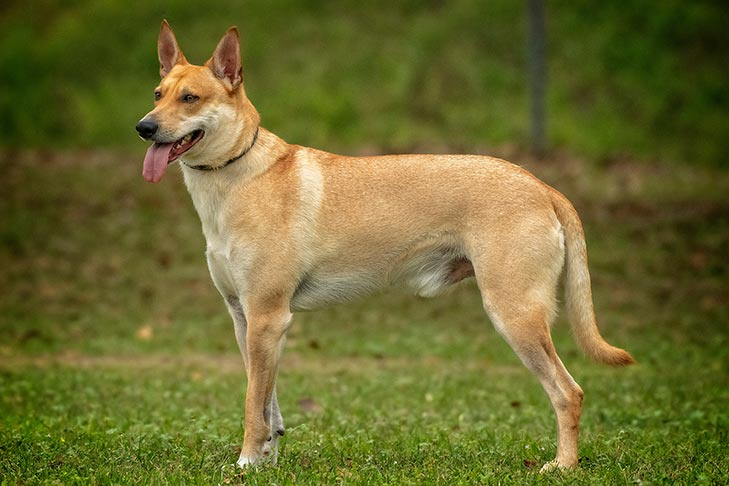

In [59]:
from PIL import Image
import io
Image.open(io.BytesIO(img_bytes))

In [60]:

response = predictor.predict(img_bytes, initial_args={"ContentType": "image/jpeg"})

In [61]:
import numpy as np
np.argmax(response)

42

In [62]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: pytorch-inference-2024-01-28-19-59-41-421
INFO:sagemaker:Deleting endpoint with name: pytorch-inference-2024-01-28-19-59-41-421
